In [1]:
import pandas as pd

db = pd.read_csv('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/marketingCampaign3/campaign3.csv')
pd.set_option('display.max_columns', None)
db.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [2]:
db.columns 

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [3]:
db['Duration'].unique()

array(['30 days', '60 days', '15 days', '45 days'], dtype=object)

In [4]:
db['Duration'] = db['Duration'].apply(lambda x: x.split(' ')[0])

In [5]:
db['Duration'].unique()

array(['30', '60', '15', '45'], dtype=object)

In [6]:
db.drop(['Campaign_ID', 'Company'], axis=1, inplace=True)

In [7]:
db['Date'] = pd.to_datetime(db['Date'])

db['year'] = db['Date'].dt.year
db['month'] = db['Date'].dt.month
db['day'] = db['Date'].dt.day

db.drop(['Date'], axis=1, inplace=True)

db.head()

,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,year,month,day
0,Email,Men 18-24,30,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021,1,1
1,Email,Women 35-44,60,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021,1,2
2,Influencer,Men 25-34,30,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021,1,3
3,Display,All Ages,60,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021,1,4
4,Email,Men 25-34,15,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021,1,5


In [8]:
db_dummies = pd.get_dummies(db, columns=['Campaign_Type', 'Target_Audience', 'Channel_Used', 'Location', 'Language', 'Customer_Segment'], drop_first=True)
pd.set_option('display.max_columns', None)
db_dummies.head()

,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score,year,month,day,Campaign_Type_Email,Campaign_Type_Influencer,Campaign_Type_Search,Campaign_Type_Social Media,Target_Audience_Men 18-24,Target_Audience_Men 25-34,Target_Audience_Women 25-34,Target_Audience_Women 35-44,Channel_Used_Facebook,Channel_Used_Google Ads,Channel_Used_Instagram,Channel_Used_Website,Channel_Used_YouTube,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Language_French,Language_German,Language_Mandarin,Language_Spanish,Customer_Segment_Foodies,Customer_Segment_Health & Wellness,Customer_Segment_Outdoor Adventurers,Customer_Segment_Tech Enthusiasts
0,30,0.04,"$16,174.00",6.29,506,1922,6,2021,1,1,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,60,0.12,"$11,566.00",5.61,116,7523,7,2021,1,2,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,30,0.07,"$10,200.00",7.18,584,7698,1,2021,1,3,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False
3,60,0.11,"$12,724.00",5.55,217,1820,7,2021,1,4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
4,15,0.05,"$16,452.00",6.50,379,4201,3,2021,1,5,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False


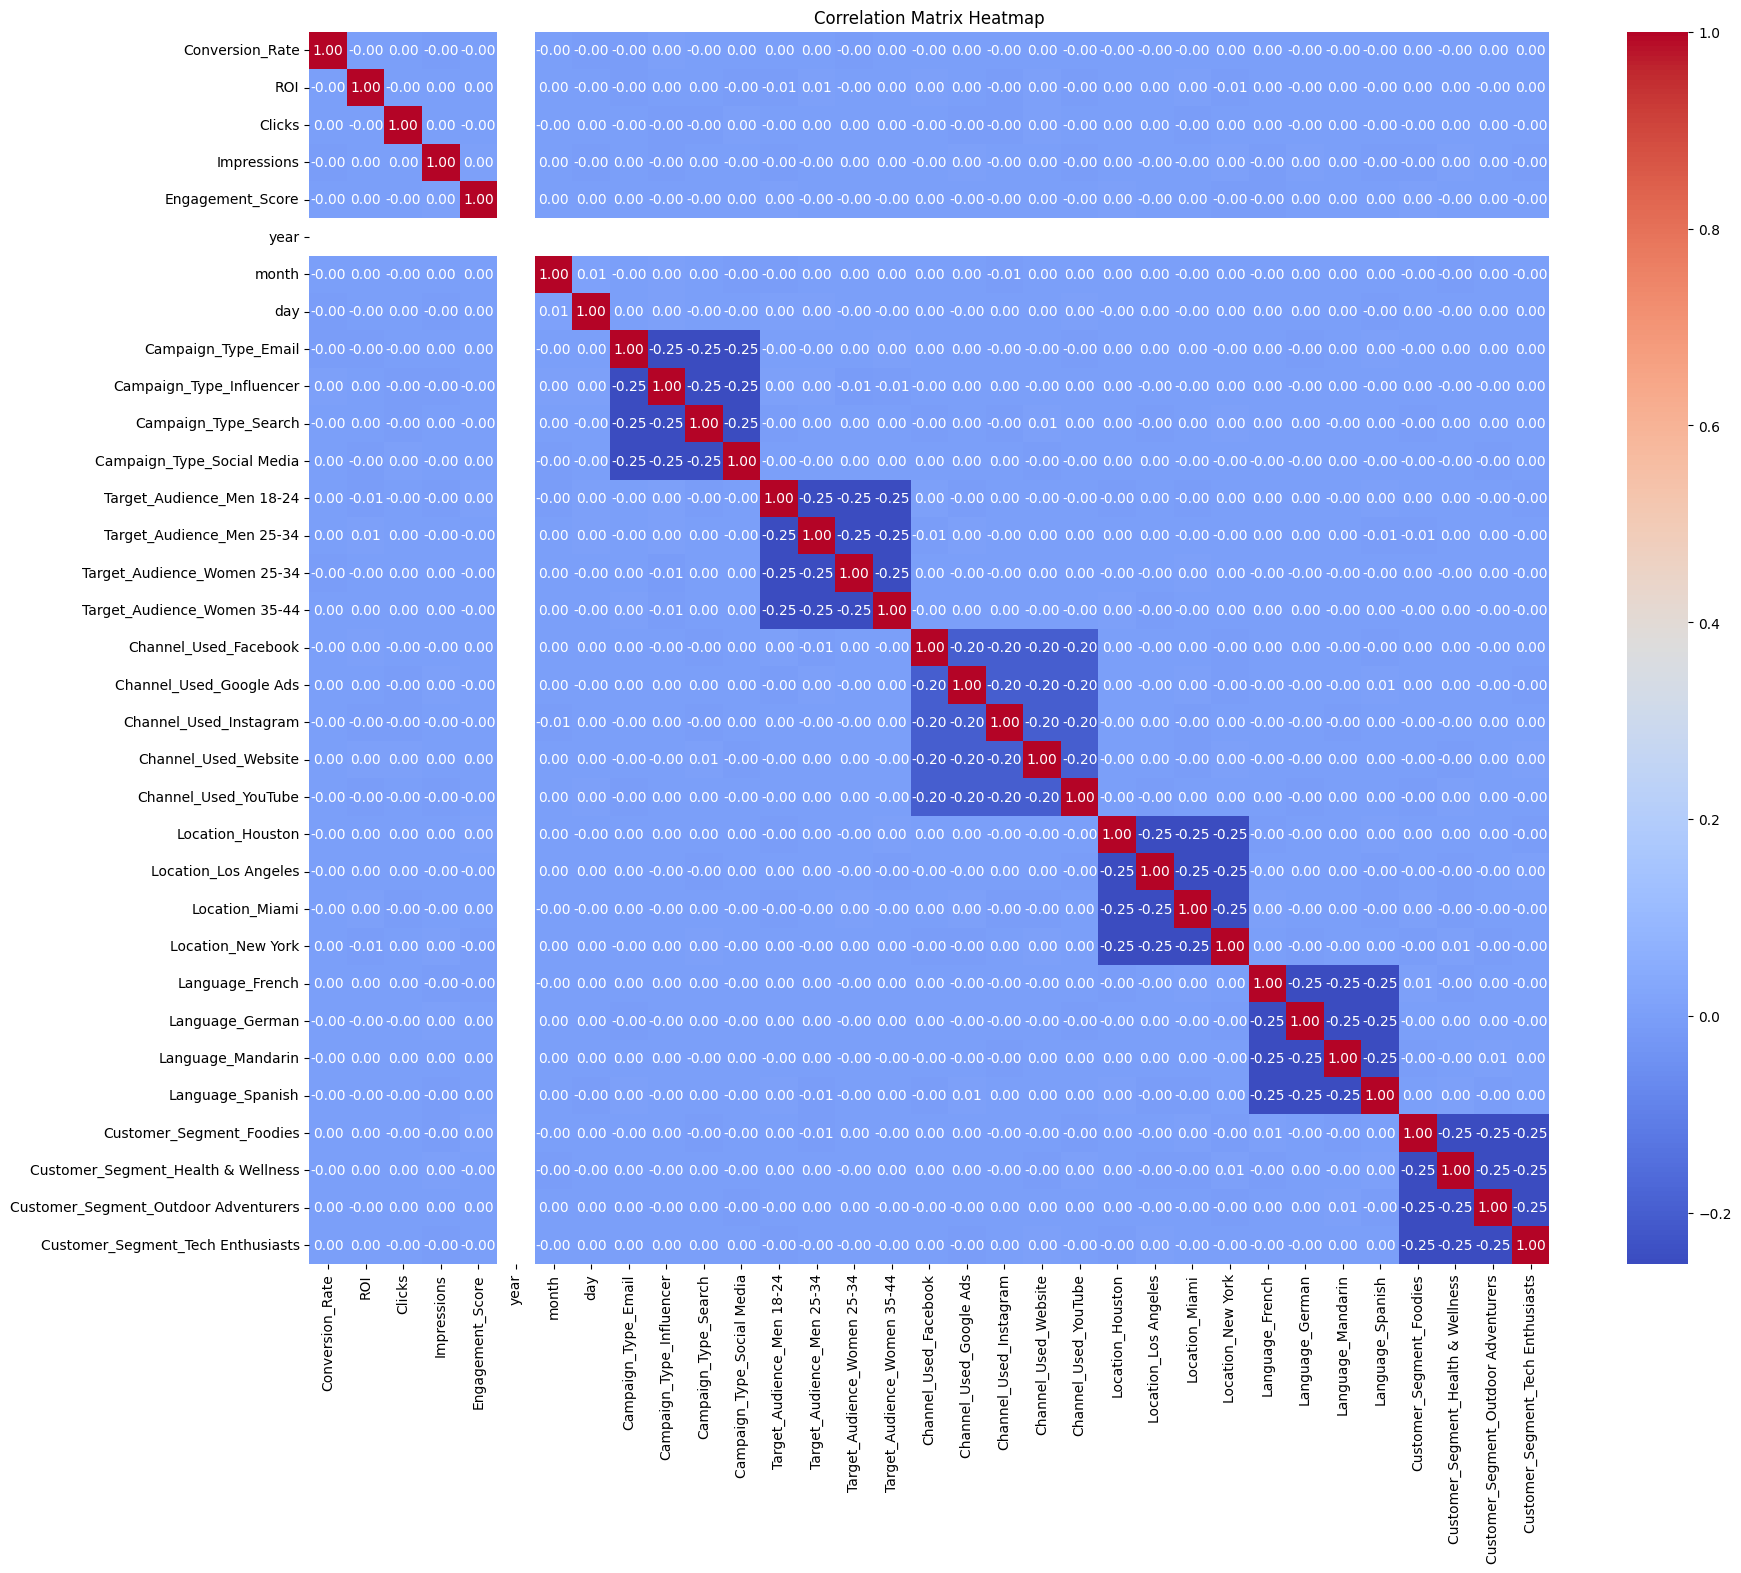

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = db_dummies.select_dtypes(include=['number', 'bool']).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()